In [20]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans 
import matplotlib.pyplot as plt
%matplotlib inline

We do not need the following columns:
1. Date
2. Helpful Votes
3. Words
Since we cannot process dates and the other 2 since they are representing the same data as theit Z-Scores

In [6]:
data = pd.read_csv(r'C:\Users\aksha\PycharmProjects\FinalProject_WorkingCopy\FinalFeatures.csv')
data_less_columns = data.drop(['Date','Helpful Votes','Words'],axis = 1)
data_less_columns.head()

,Stars,Z_Score_HelpfulVotes,Z_Score_Words,Paragraphs,No.break tags,Percentage_Upper_Case,Percentage_Lower_Case,Avg_len_paragraph_per_review
0,3,-0.235881,6.453577,1,0,3,93,3087.000000
1,5,0.915696,1.394079,3,4,3,91,300.000000
2,4,1.491485,3.666459,4,6,4,90,468.500000
3,4,5.522007,8.525083,11,20,3,91,394.272727
4,5,0.339908,1.795826,2,1,6,91,492.000000


We want to perform PCA on the data in order to reduce the number of dimensions it has.

PCA is known to work better when the data is properly scaled. Now, since the data has a wide variety of scales, dimensionality reduction will not be accurate until the data is rescaled.

In [11]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))

rescaled_data = scaler.fit_transform(data_less_columns)
rescaled_data = pd.DataFrame(rescaled_data,columns=data_less_columns.columns)
rescaled_data.head()

,Stars,Z_Score_HelpfulVotes,Z_Score_Words,Paragraphs,No.break tags,Percentage_Upper_Case,Percentage_Lower_Case,Avg_len_paragraph_per_review
0,0.50,0.000484,0.315262,0.000000,0.000000,0.03,0.93,0.417478
1,1.00,0.025593,0.091377,0.015873,0.026846,0.03,0.91,0.040449
2,0.75,0.038147,0.191931,0.023810,0.040268,0.04,0.90,0.063244
3,0.75,0.126026,0.406928,0.079365,0.134228,0.03,0.91,0.053202
4,1.00,0.013038,0.109154,0.007937,0.006711,0.06,0.91,0.066423


Now, we will try to perform PCA on the rescaled data

In [13]:
pca_rescaled = PCA(n_components=6)
pca_rescaled_data = pca_rescaled.fit_transform(rescaled_data)
pca_rescaled.components_

array([[  1.00000000e+00,  -0.00000000e+00,  -0.00000000e+00,
         -0.00000000e+00,  -0.00000000e+00,  -0.00000000e+00],
       [ -0.00000000e+00,   1.00000000e+00,   2.73734454e-16,
         -2.14402001e-16,  -5.16898490e-17,   3.99487601e-17],
       [  0.00000000e+00,  -1.32406944e-16,   1.00000000e+00,
         -1.42409237e-16,  -3.21004799e-16,   2.95901988e-16],
       [  0.00000000e+00,   3.24700706e-16,   1.16743719e-16,
          1.00000000e+00,  -4.69641370e-15,   4.43976299e-16],
       [ -0.00000000e+00,  -8.79841201e-19,   3.46284822e-16,
          4.69895092e-15,   1.00000000e+00,  -5.19031601e-18],
       [  0.00000000e+00,  -1.10741392e-16,  -3.15067442e-16,
         -3.82943626e-16,   1.20778413e-16,   1.00000000e+00]])

KMeans Clustering

In order to determine the ideal number of clusters that we need, we can try KMeans with multiple cluster ranges and find the best value for k using the elbow method.

The elbow method is based on the WCSS(Within Cluster Sum of Squares) which calculates the sum of distances from the centroids to each point within a cluster, square it and add the value to the sums of all the other clusters.

Lesser the total value of WCSS for a value of k the better we fit the data.

Using the elbow method to find the optimal number of clusters for our dataset.

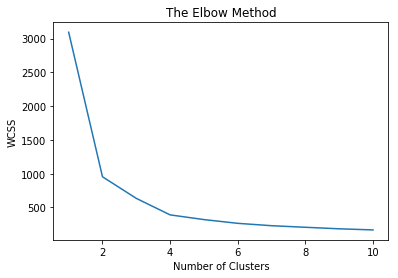

In [35]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter=300, n_init = 10, random_state = 0)
    kmeans.fit(pca_rescaled_data)
    wcss.append(kmeans.inertia_) # inertia_ (refers to WCSS)is the attribute provided by sklearn for the value of WCSS.
plt.plot(range(1,11),wcss)
plt.title("The Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()

Here it is pretty clear to us that the ideal number of clusters is 4 since the elbow is at "4".

Now, we can perform KMeans clustering with the value of k as 4

In [36]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state=0, max_iter=300, n_init=10)
kmeans_cluster_no_each_review = kmeans.fit_predict(rescaled_data)
kmeans_cluster_no_each_review = pd.Series(kmeans_cluster_no_each_review)
kmeans_cluster_no_each_review.head()

0    0
1    1
2    0
3    0
4    1
dtype: int32